In [1]:
import pandas as pd
import numpy as np
from sklearn import tree
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-dark')
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
import pylab
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, multilabel_confusion_matrix, accuracy_score, classification_report

In [2]:
data = pd.read_excel('/Users/rahul/Lewis Assignments /Data Mining/Assignment 5/Dry_Bean_Dataset.xlsx')

In [3]:
data.head(10)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,1,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,2,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,3,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,4,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,5,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
5,6,30279,634.927,212.560556,181.510182,1.171067,0.520401,30600,196.347702,0.775688,0.989510,0.943852,0.923726,0.007020,0.003153,0.853270,0.999236,SEKER
6,7,30477,670.033,211.050155,184.039050,1.146768,0.489478,30970,196.988633,0.762402,0.984081,0.853080,0.933374,0.006925,0.003242,0.871186,0.999049,SEKER
7,8,30519,629.727,212.996755,182.737204,1.165591,0.513760,30847,197.124320,0.770682,0.989367,0.967109,0.925480,0.006979,0.003158,0.856514,0.998345,SEKER
8,9,30685,635.681,213.534145,183.157146,1.165852,0.514081,31044,197.659696,0.771561,0.988436,0.954240,0.925658,0.006959,0.003152,0.856844,0.998953,SEKER
9,10,30834,631.934,217.227813,180.897469,1.200834,0.553642,31120,198.139012,0.783683,0.990810,0.970278,0.912125,0.007045,0.003008,0.831973,0.999061,SEKER


In [4]:
# Defining the number of observations and attributes
data.shape

(13611, 18)

In [5]:
data.columns

Index(['Bean ID', 'Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [6]:
# fetching data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13611 entries, 0 to 13610
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Bean ID          13611 non-null  int64  
 1   Area             13611 non-null  int64  
 2   Perimeter        13611 non-null  float64
 3   MajorAxisLength  13611 non-null  float64
 4   MinorAxisLength  13611 non-null  float64
 5   AspectRation     13611 non-null  float64
 6   Eccentricity     13611 non-null  float64
 7   ConvexArea       13611 non-null  int64  
 8   EquivDiameter    13611 non-null  float64
 9   Extent           13611 non-null  float64
 10  Solidity         13611 non-null  float64
 11  roundness        13611 non-null  float64
 12  Compactness      13611 non-null  float64
 13  ShapeFactor1     13611 non-null  float64
 14  ShapeFactor2     13611 non-null  float64
 15  ShapeFactor3     13611 non-null  float64
 16  ShapeFactor4     13611 non-null  float64
 17  Class       

- As we can see there are no null values in the dataset

In [7]:
# Performing descriptive stastics 
data.describe()

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,6806.000000,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,3929.301592,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,1.000000,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,3403.500000,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,6806.000000,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,10208.500000,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,13611.000000,254616.000000,1985.370000,738.860153,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


# Performing EDA

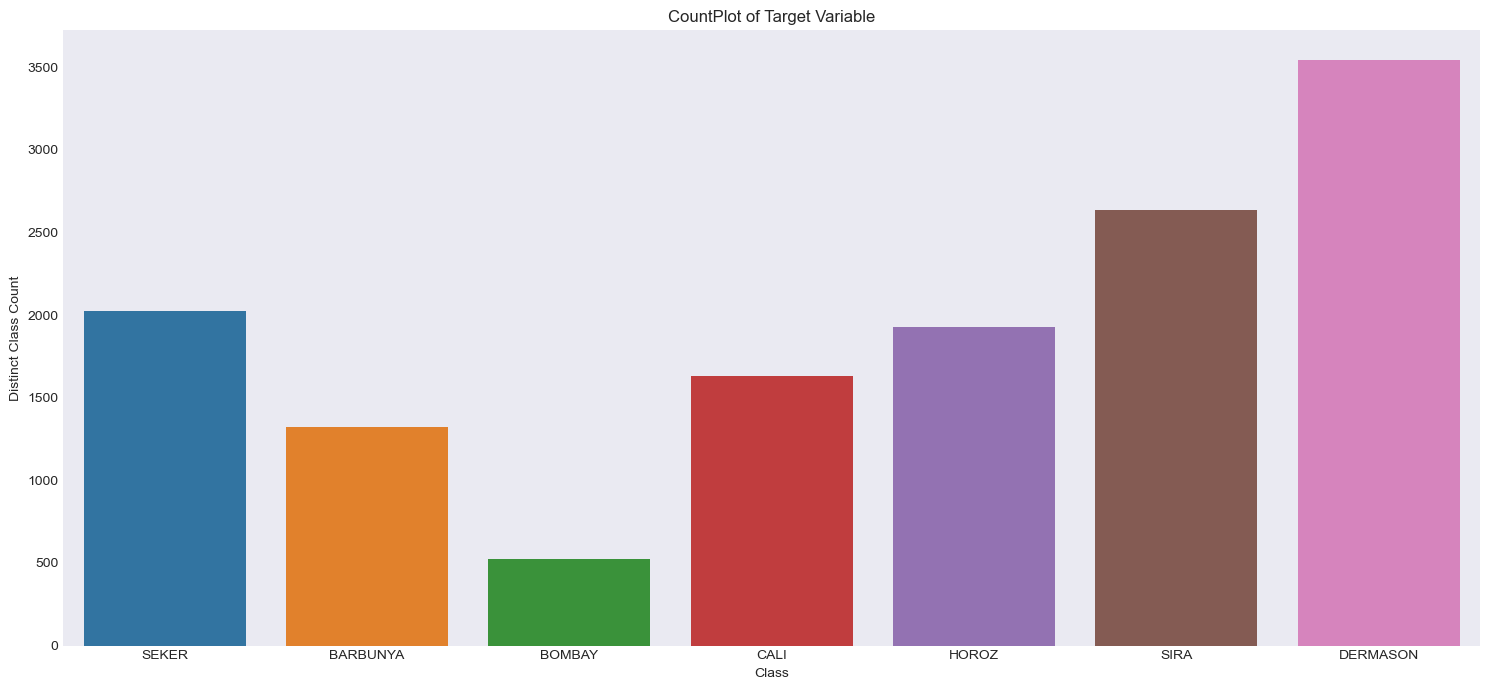

In [9]:
plt.figure(figsize=(15,7))
sns.countplot(x='Class', data=data)
plt.xlabel('Class')
plt.ylabel('Distinct Class Count')
plt.title('CountPlot of Target Variable')
plt.tight_layout()

- Dermason class in the target variable has the highest count 

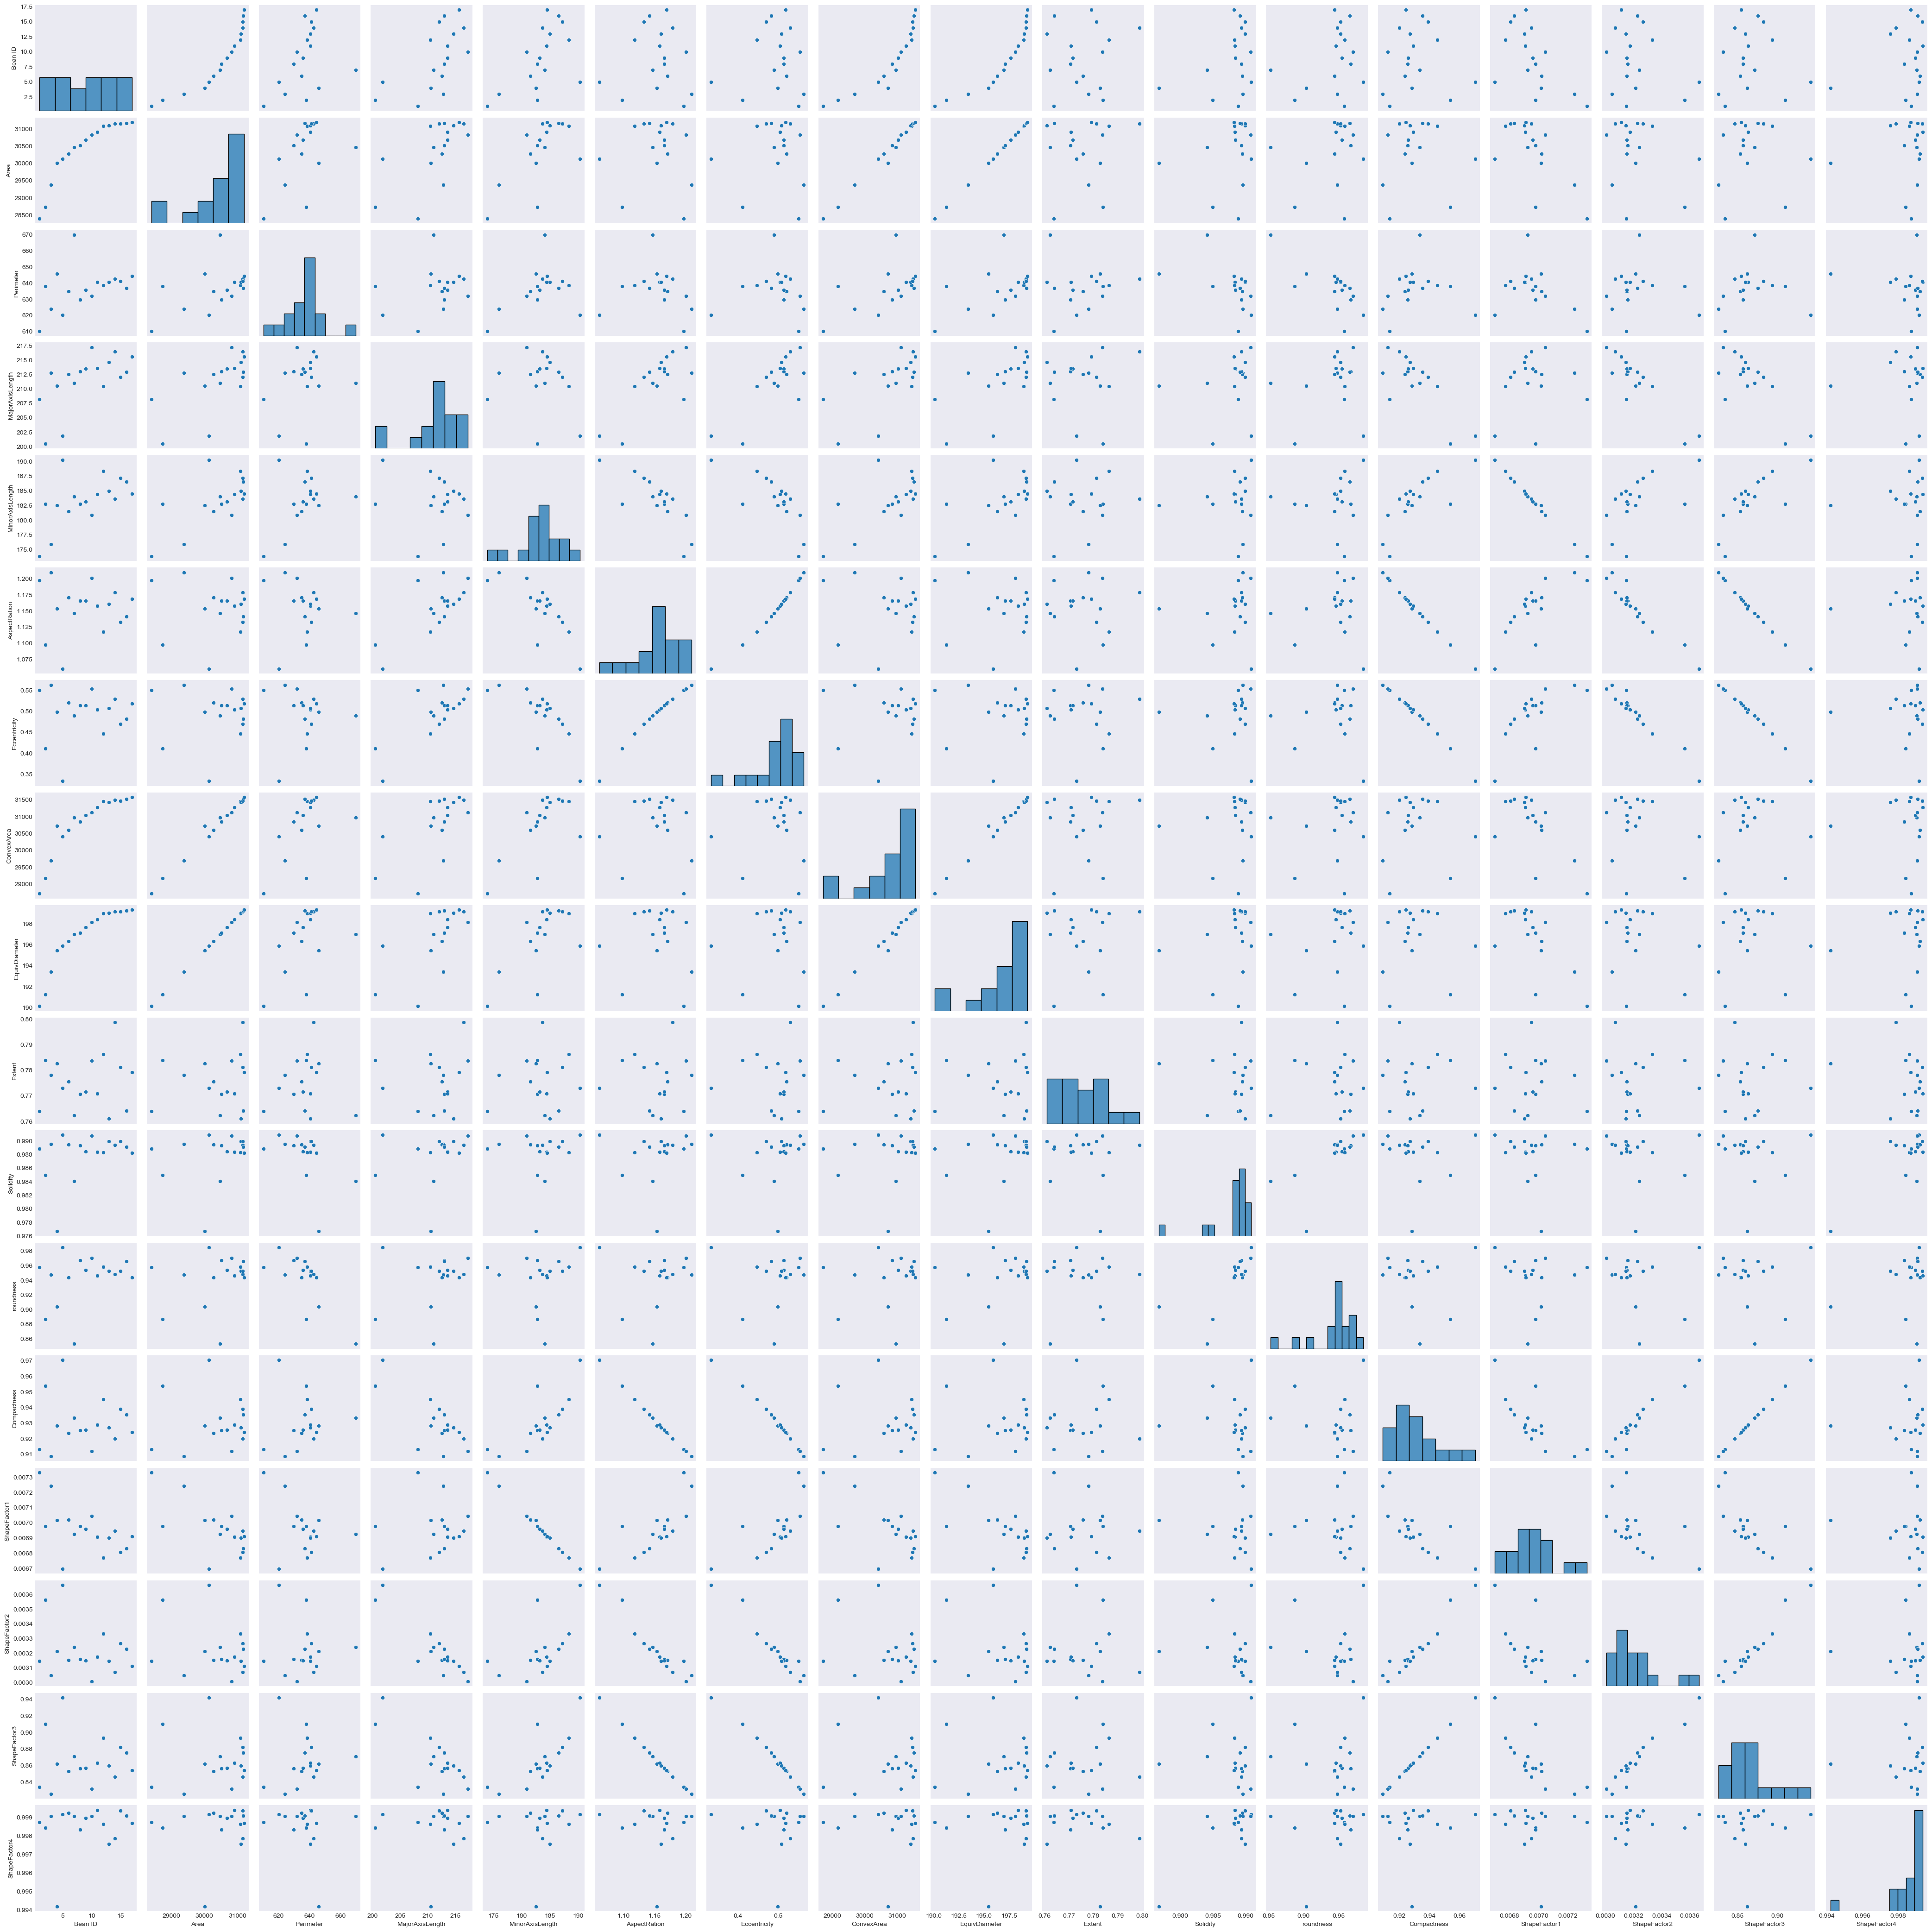

In [10]:
# Checkinng the distribution of variables
df = data[0:17]
sns.pairplot(data=df)

- As we can see from the above pairplot some variables are highly correlated with each other let's explore them in depth. I am going to perform correlation analysis to find out the multicollinearity between variables later I will polt a heat map so that we will have a clear picture and at what percent the variables are correlated with each other .

In [11]:
df_correlation = data.corr()
df_correlation

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Bean ID,1.000000,-0.369273,-0.411175,-0.324677,-0.502747,0.139467,0.308182,-0.369615,-0.418614,-0.099929,0.087182,0.115936,-0.201095,0.602610,0.074040,-0.223753,0.058103
Area,-0.369273,1.000000,0.966722,0.931834,0.951602,0.241735,0.267481,0.999939,0.984968,0.054345,-0.196585,-0.357530,-0.268067,-0.847958,-0.639291,-0.272145,-0.355721
Perimeter,-0.411175,0.966722,1.000000,0.977338,0.913179,0.385276,0.391066,0.967689,0.991380,-0.021160,-0.303970,-0.547647,-0.406857,-0.864623,-0.767592,-0.408435,-0.429310
MajorAxisLength,-0.324677,0.931834,0.977338,1.000000,0.826052,0.550335,0.541972,0.932607,0.961733,-0.078062,-0.284302,-0.596358,-0.568377,-0.773609,-0.859238,-0.568185,-0.482527
MinorAxisLength,-0.502747,0.951602,0.913179,0.826052,1.000000,-0.009161,0.019574,0.951339,0.948539,0.145957,-0.155831,-0.210344,-0.015066,-0.947204,-0.471347,-0.019326,-0.263749
AspectRation,0.139467,0.241735,0.385276,0.550335,-0.009161,1.000000,0.924293,0.243301,0.303647,-0.370184,-0.267754,-0.766979,-0.987687,0.024593,-0.837841,-0.978592,-0.449264
Eccentricity,0.308182,0.267481,0.391066,0.541972,0.019574,0.924293,1.000000,0.269255,0.318667,-0.319362,-0.297592,-0.722272,-0.970313,0.019920,-0.860141,-0.981058,-0.449354
ConvexArea,-0.369615,0.999939,0.967689,0.932607,0.951339,0.243301,0.269255,1.000000,0.985226,0.052564,-0.206191,-0.362083,-0.269922,-0.847950,-0.640862,-0.274024,-0.362049
EquivDiameter,-0.418614,0.984968,0.991380,0.961733,0.948539,0.303647,0.318667,0.985226,1.000000,0.028383,-0.231648,-0.435945,-0.327650,-0.892741,-0.713069,-0.330389,-0.392512
Extent,-0.099929,0.054345,-0.021160,-0.078062,0.145957,-0.370184,-0.319362,0.052564,0.028383,1.000000,0.191389,0.344411,0.354212,-0.141616,0.237956,0.347624,0.148502


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

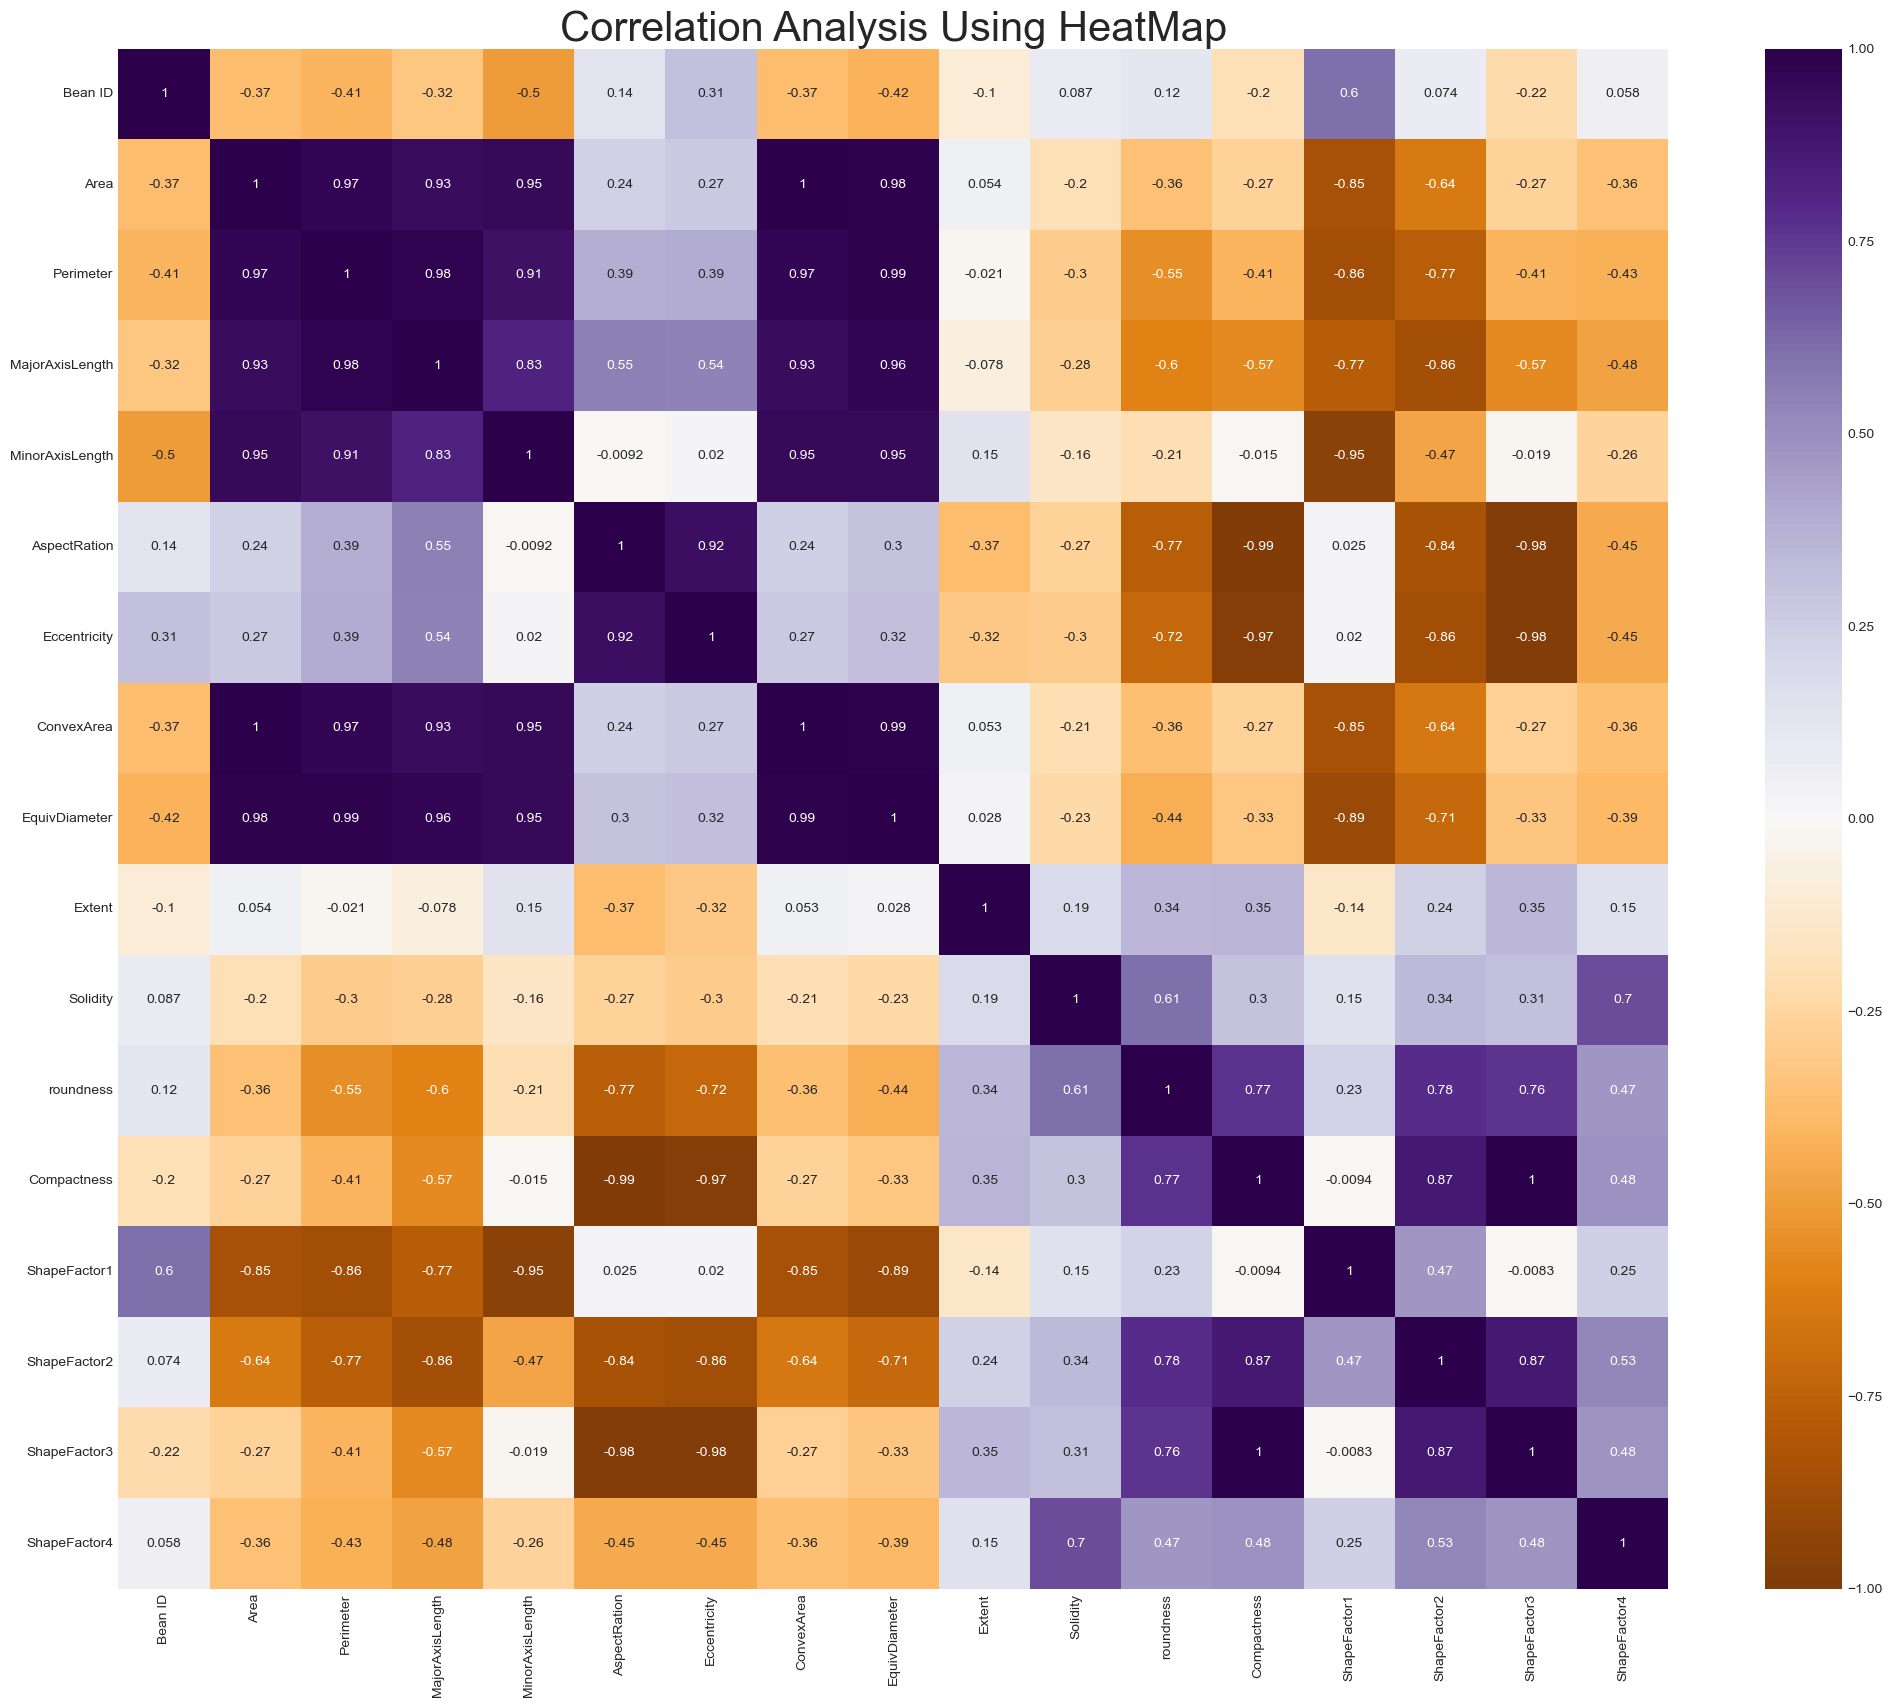

In [12]:
# Correlation Analysis using HeatMap
plt.figure(figsize=(25,20))
sns.heatmap(data=df_correlation, vmin= -1, vmax= +1, annot=True, cmap=plt.cm.PuOr)
plt.title('Correlation Analysis Using HeatMap', fontsize=30)
plt.tight_layout

- In statistics, the Pearson correlation coefficient (PCC) is a correlation coefficient that measures linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations; thus, it is essentially a normalized measurement of the covariance, such that the result always has a value between −1 and 1. As with covariance itself, the measure can only reflect a linear correlation of variables, and ignores many other types of relationships or correlations. As a simple example, one would expect the age and height of a sample of teenagers from a high school to have a Pearson correlation coefficient significantly greater than 0, but less than 1 (as 1 would represent an unrealistically perfect correlation).

* Positively correlated variables :
    
    
    
    
- Here we can see that MajorAxisLength and MinorAxisLength are positively correlated with Convexarea(0.93, 0.95) andEquivDiammeter(0.96, 0.95)
- Perimmeter is correlated with EquivDiameter(0.99) and convexarea(0.97) 
- Area is Correlated with EquivDiammeter(0.98) and convexarea(1)
- Compactness has a correlation of 1 with ShapeFactor3
- ShapeFactor2 have a correlation of 0.87 with ShapeFactor3



* Negatively correlated variables :
    
    
    
- Compactness is highly negatively correlated with AspectRation(-0.99) and Eccentricity(-0.97)
- ShapeFactor3 is negatively correlated with Eccentricity(-0.98) and AspectRation(-0.98)
- ShapeFactor1 is negatively correlated with EquivDiammeter(-0.89), Convexarea(-0.85), MinorAxisLength(-0.95), Perimmeter(-0.86) and Area(-0.85)
- ShapeFactor 2 is also negatively correlated with Eccentricity(-0.86), AspectRation(-0.84) and MajorAxisLength(-0.86)





                           ***This also helps us in filtering out the variables***

In [13]:
# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(data, threshold_p, threshold_n):
    corr_cols = set() # Set of all the names of correlated columns
    corr_neg_cols = set()
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold_p: # we are interested in absolute coeff value
                col_name = corr_matrix.columns[i] # getting the name of column
                corr_cols.add(col_name)
                
            if (corr_matrix.iloc[i,j]) < threshold_n: # we are interested in absolute coeff value
                col_name = corr_matrix.columns[i] # getting the name of column
                corr_neg_cols.add(col_name)
    print(corr_cols, corr_neg_cols)

##### Here are the columns that are highly positively and negatively correlated and the threshold value I am considering is 0.8, -0.8 

In [14]:
corr_features = correlation(data, 0.8, -0.8)
corr_features

{'MajorAxisLength', 'Compactness', 'ShapeFactor1', 'ShapeFactor3', 'Perimeter', 'MinorAxisLength', 'ShapeFactor2', 'Eccentricity', 'EquivDiameter', 'ConvexArea'} {'ShapeFactor2', 'ShapeFactor3', 'Compactness', 'ShapeFactor1'}


In [15]:
data_x = data.drop('Class', axis=1)

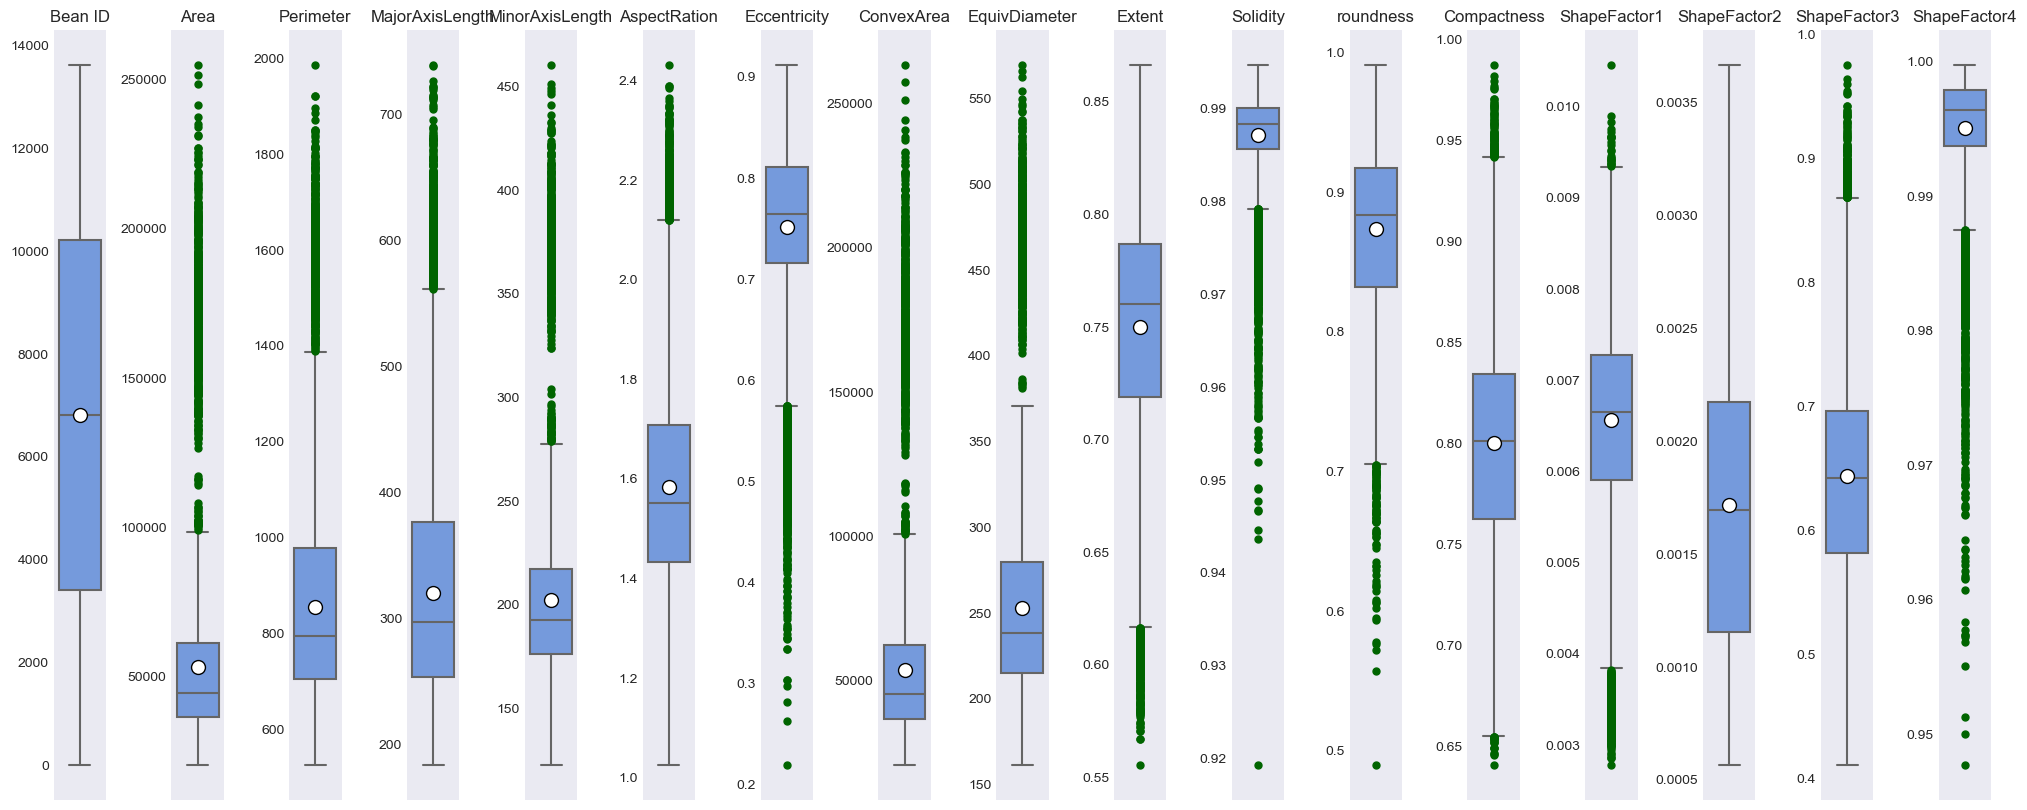

In [16]:
# Checking for outliers
inputs = list(data_x.columns) #convert the column names to a list

# Determine the number of logging curves
num_inputs = len(inputs)

# Create a figure with 1 row, and num_inputs long
fig, axs = plt.subplots(1, num_inputs, figsize=(25,10))

# Use a for loop to loop over each column in the dataframe and 
# create a separate box plot
for i, (ax, col) in enumerate(zip(axs.flat, inputs)):
    sns.boxplot(y=data_x[col], ax=ax, color='cornflowerblue', showmeans=True,  
            meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"},
           flierprops={'marker':'o', 
                      'markerfacecolor':'darkgreen',
                      'markeredgecolor':'darkgreen'})
    
    ax.set_title(inputs[i])
    ax.set_ylabel('')
    
plt.subplots_adjust(hspace=0.15, wspace=1.25)
plt.show()

* There are plethora of outliers in the dataset as it can be observed fromm the above figure In descriptive statistics, a box plot or boxplot is a method for graphically demonstrating the locality, spread and skewness groups of numerical data through their quartiles.



* [1] In addition to the box on a box plot, there can be lines (which are called whiskers) extending from the box indicating variability outside the upper and lower quartiles, thus, the plot is also called the box-and-whisker plot and the box-and-whisker diagram. Outliers that differ significantly from the rest of the dataset. 


* [2] may be plotted as individual points beyond the whiskers on the box-plot. Box plots are non-parametric: they display variation in samples of a statistical population without making any assumptions of the underlying statistical distribution.


* [3] (though Tukey's boxplot assumes symmetry for the whiskers and normality for their length). The spacings in each subsection of the box-plot indicate the degree of dispersion (spread) and skewness of the data, which are usually described using the five-number summary. In addition, the box-plot allows one to visually estimate various L-estimators, notably the interquartile range, midhinge, range, mid-range, and trimean. Box plots can be drawn either horizontally or vertically.

     ***Since most of the classification algorithms are robust to outliers I am not inclined to remove the outliers***

In [17]:
data_x = data_x.drop('Bean ID', axis=1)

In [18]:
#Encoding 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Class'] = le.fit_transform(data['Class'])

In [19]:
data.tail(20)

,Bean ID,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
13591,13592,41964,756.887,287.164102,186.271108,1.541646,0.761081,42310,231.149787,0.798706,0.991822,0.920502,0.804940,0.006843,0.001772,0.647928,0.998875,3
13592,13593,41966,746.121,273.508678,195.449153,1.399385,0.699534,42250,231.155296,0.751998,0.993278,0.947303,0.845148,0.006517,0.002051,0.714275,0.999546,3
13593,13594,41979,757.238,272.579920,196.580706,1.386606,0.692742,42362,231.191096,0.722381,0.990959,0.919977,0.848159,0.006493,0.002073,0.719374,0.997487,3
13594,13595,41992,763.279,293.224122,182.879522,1.603373,0.781676,42415,231.226891,0.802323,0.990027,0.905753,0.788567,0.006983,0.001666,0.621838,0.997038,3
13595,13596,41995,765.763,284.073178,188.591957,1.506285,0.747835,42477,231.235150,0.732514,0.988653,0.899951,0.813999,0.006764,0.001832,0.662594,0.998055,3
13596,13597,42008,759.454,280.332717,191.218136,1.466036,0.731248,42419,231.270938,0.711710,0.990311,0.915248,0.824987,0.006673,0.001907,0.680604,0.997790,3
13597,13598,42008,773.158,294.492203,181.847359,1.619447,0.786575,42547,231.270938,0.692230,0.987332,0.883091,0.785321,0.007010,0.001645,0.616729,0.998760,3
13598,13599,42012,778.043,297.912812,179.711836,1.657725,0.797562,42544,231.281949,0.715805,0.987495,0.872120,0.776341,0.007091,0.001589,0.602705,0.999120,3
13599,13600,42023,746.715,272.962686,196.334047,1.390297,0.694730,42365,231.312225,0.795348,0.991927,0.947081,0.847413,0.006496,0.002066,0.718109,0.998386,3
13600,13601,42026,751.050,278.071141,192.956760,1.441106,0.720060,42358,231.320481,0.753830,0.992162,0.936247,0.831875,0.006617,0.001955,0.692016,0.997269,3


##### I will exclude the following columns such as 
* Compactness,
* Area, 
* Perimeter, 
* Eccentricity, 
* ConvexArea, 
* EquivDiameter, 
* ShapeFactor1, 
* ShapeFactor3

In [20]:
# Excluding redundant features
data_x = data_x.drop(['Compactness', 'Area', 'Perimeter', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'ShapeFactor1',
                  'ShapeFactor3'], axis=1)
data_x

,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
0,208.178117,173.888747,1.197191,0.763923,0.988856,0.958027,0.003147,0.998724
1,200.524796,182.734419,1.097356,0.783968,0.984986,0.887034,0.003564,0.998430
2,212.826130,175.931143,1.209713,0.778113,0.989559,0.947849,0.003048,0.999066
3,210.557999,182.516516,1.153638,0.782681,0.976696,0.903936,0.003215,0.994199
4,201.847882,190.279279,1.060798,0.773098,0.990893,0.984877,0.003665,0.999166
...,...,...,...,...,...,...,...,...
13606,288.721612,185.944705,1.552728,0.714574,0.990331,0.916603,0.001749,0.998385
13607,281.576392,190.713136,1.476439,0.799943,0.990752,0.922015,0.001886,0.998219
13608,281.539928,191.187979,1.472582,0.729932,0.989899,0.918424,0.001888,0.996767
13609,283.382636,190.275731,1.489326,0.705389,0.987813,0.907906,0.001852,0.995222


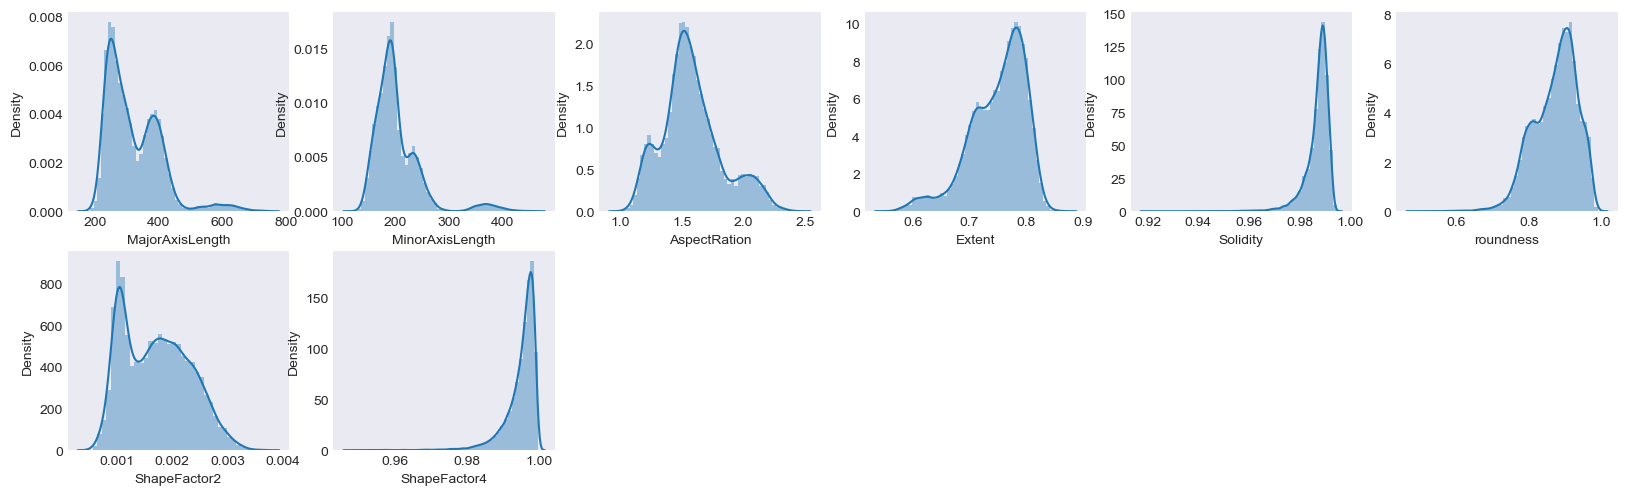

In [21]:
# Checking distribution of the dataset to tranform using box-cox if they are skewed either right or left 
var = data_x.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(data_x[col])

plt.show()

In [22]:
var = data_x.columns
skew_list = []
for i in var:
    skew_list.append(data_x[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=['Features']), pd.DataFrame(skew_list, columns=['Skewness'])], axis=1)
tmp.set_index('Features', inplace=True)
tmp.T

Features,MajorAxisLength,MinorAxisLength,AspectRation,Extent,Solidity,roundness,ShapeFactor2,ShapeFactor4
Skewness,1.357815,2.238211,0.582573,-0.895348,-2.550093,-0.635749,0.301226,-2.759483


In [23]:
# Filtering the features which has skewness less than -1 and greater than +1
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
print(skewed)

Index(['MajorAxisLength', 'MinorAxisLength', 'Solidity', 'ShapeFactor4'], dtype='object', name='Features')


* Most of the variables are skewed we need to tranform the data so that they are normalized I will apply boxcox transormation to the attributes that are skewed after removing unwanted variables 

In [24]:
#checking whether feature is guassian or normal distributed using Q-Q Plot and applying boxcox transformation for the data to be normal 
def plot_data(data_x, feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2),
    stats.probplot(data_x[feature], dist='norm', plot=pylab)
    plt.show()

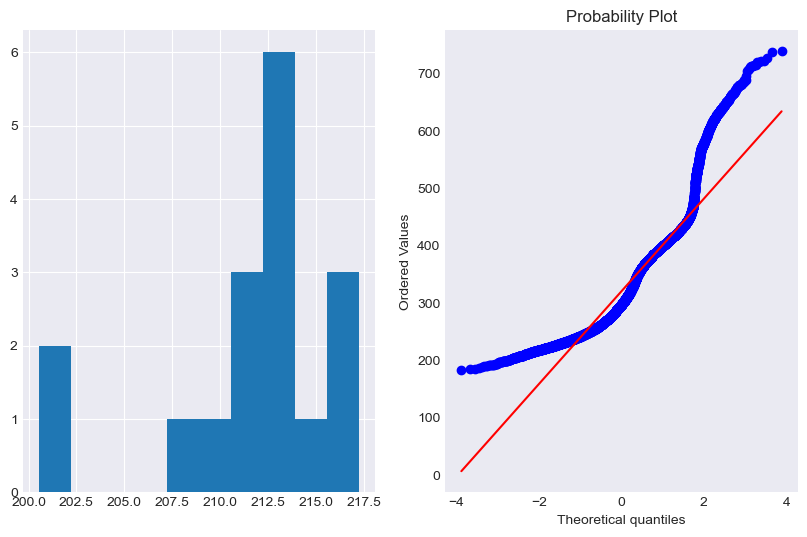

In [25]:
# Distribution of MajorAxisLenngth
plot_data(data_x, 'MajorAxisLength')

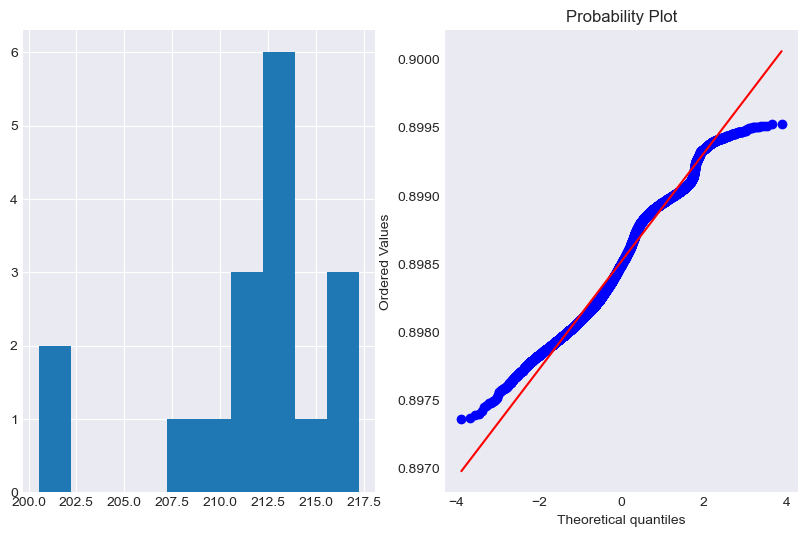

In [26]:
data_x['MajorAxisLength'], parameters = stats.boxcox(data_x.MajorAxisLength)
plot_data(data_x, 'MajorAxisLength')

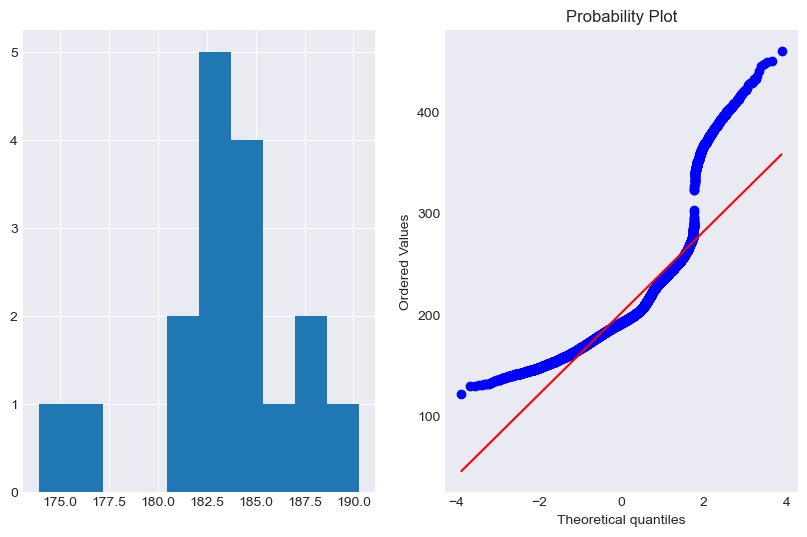

In [27]:
plot_data(data_x, 'MinorAxisLength')

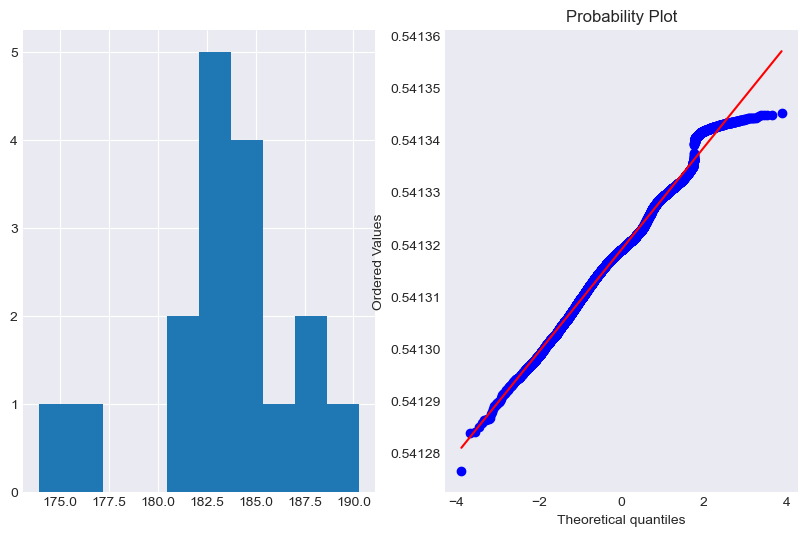

In [28]:
data_x['MinorAxisLength'], parameters = stats.boxcox(data_x.MinorAxisLength)
plot_data(data_x, 'MinorAxisLength')

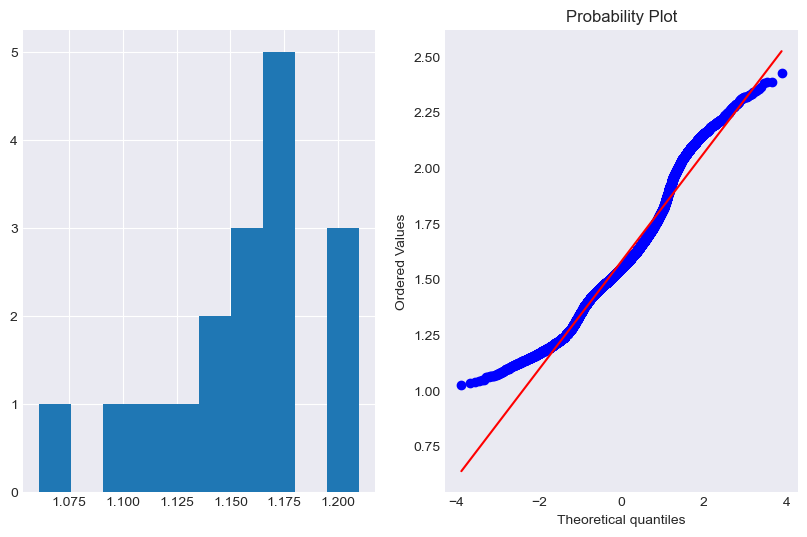

In [29]:
plot_data(data_x, 'AspectRation')

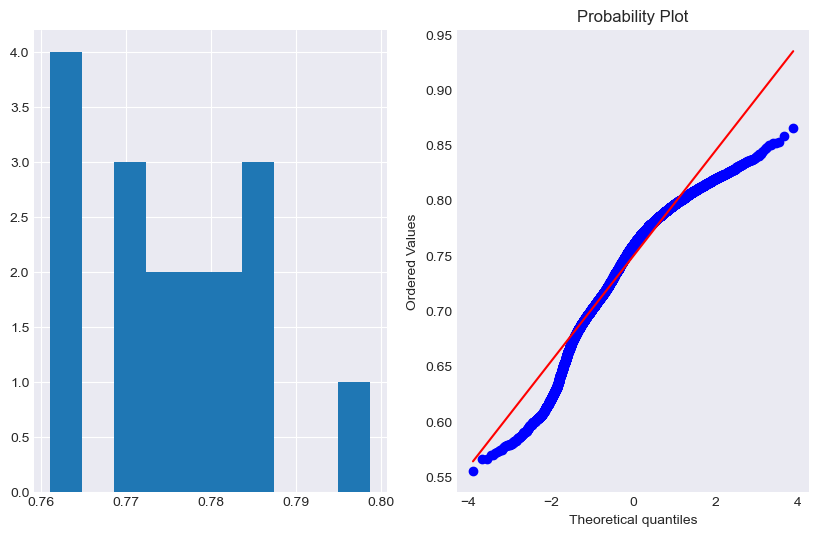

In [30]:
plot_data(data_x, 'Extent')

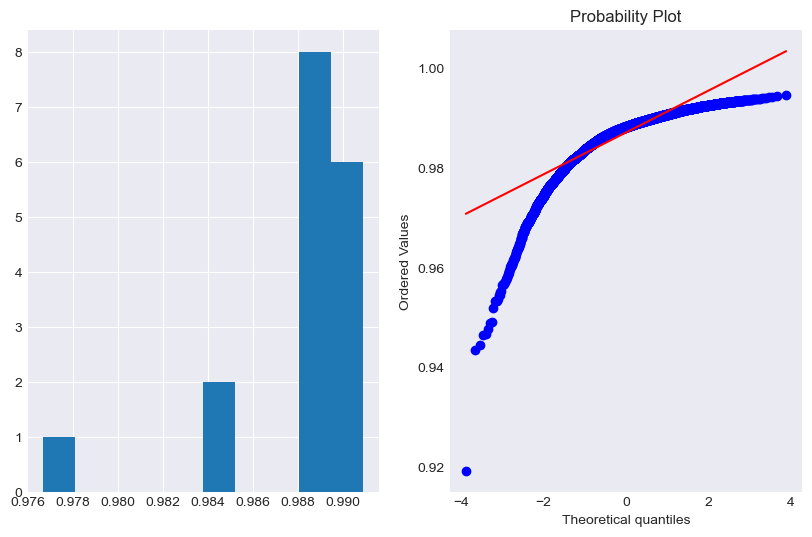

In [31]:
plot_data(data_x, 'Solidity')

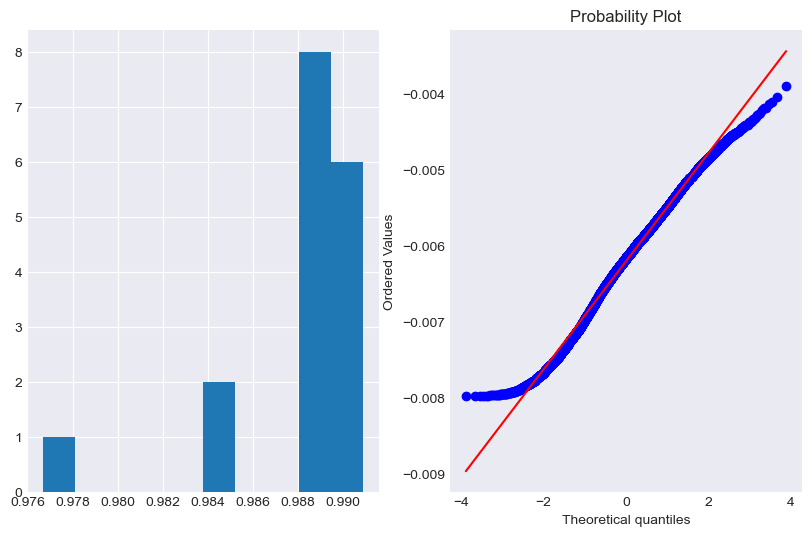

In [32]:
data_x['Solidity'], parameters = stats.boxcox(data_x.Solidity)
plot_data(data_x, 'Solidity')

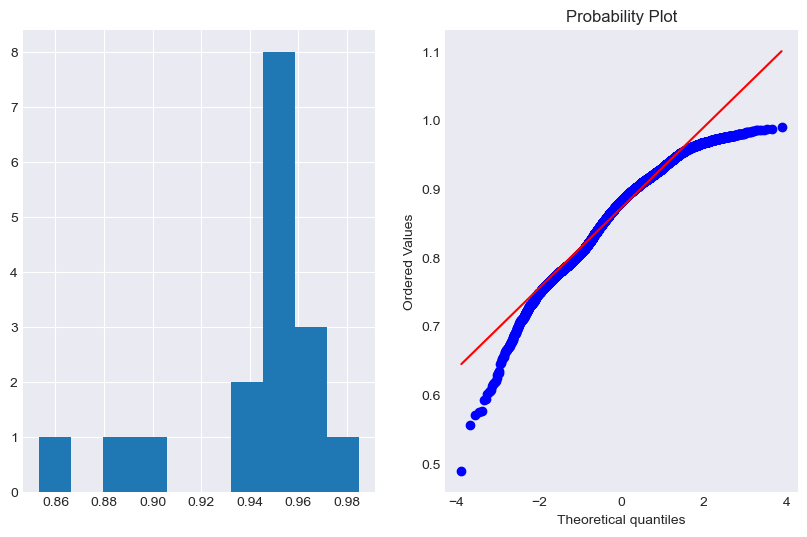

In [33]:
plot_data(data_x, 'roundness')

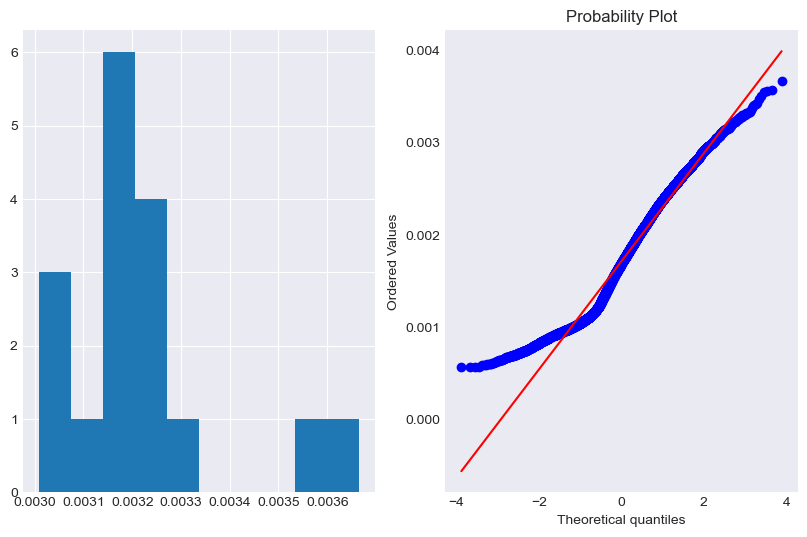

In [34]:
plot_data(data_x, 'ShapeFactor2')

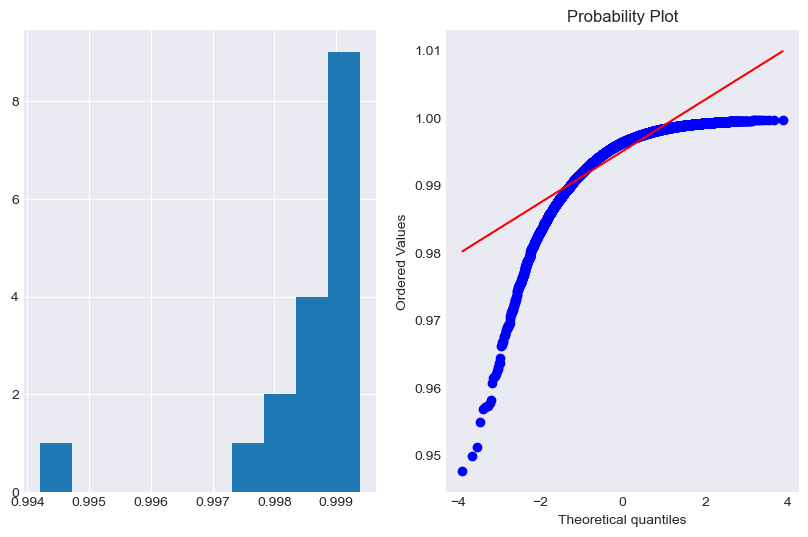

In [35]:
plot_data(data_x, 'ShapeFactor4')

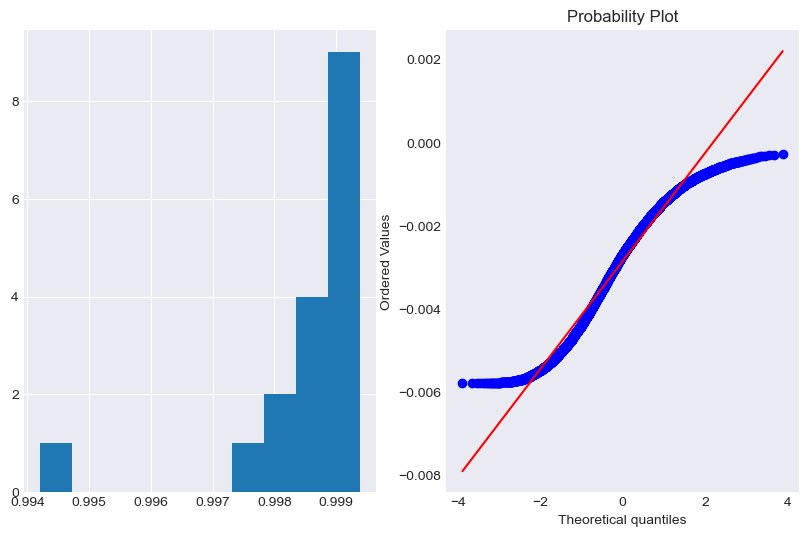

In [36]:
data_x['ShapeFactor4'], parameters = stats.boxcox(data_x.ShapeFactor4)
plot_data(data_x, 'ShapeFactor4')

- In the above figures you can notice that I have applied box-cox transformation to the required variables

In [37]:
# Standardizing data befor splitting it into training and test datasets
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_x)

In [38]:
from sklearn.model_selection import train_test_split
X = data_x
y = data['Class']
# Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [39]:
print(x_train.shape, x_test.shape)

(9527, 8) (4084, 8)


In [40]:
# Checkinng to what peecent the class labels are in y_train
print(y_train.value_counts() / y_train.shape)

3    0.262727
6    0.192820
5    0.147790
4    0.140653
2    0.120815
0    0.097302
1    0.037892
Name: Class, dtype: float64


### Performing Cross Validation

##### DecisionTree Classifier
* Decision trees classify the examples by sorting them down the tree from the root to some leaf/terminal node, with the leaf/terminal node providing the classification of the example. Each node in the tree acts as a test case for some attribute, and each edge descending from the node corresponds to the possible answers to the test case. This process is recursive in nature and is repeated for every subtree rooted at the new node.

In [41]:
# Hyperparameter Selection for DecisionTree
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion' : ['gini', 'entropy'],
    'random_state' : [0, 42, 64, 80, 100]
 }


# Instantiate the grid search model
dtree = DecisionTreeClassifier()
import sklearn
multi_roc = sklearn.metrics.make_scorer(roc_auc_score, average='weighted', multi_class='ovr', needs_proba=True)
grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= multi_roc,
                           cv = 10, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'random_state': [0, 42, 64, 80, 100]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=weighted, multi_class=ovr),
             verbose=1)

In [42]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_random_state,params,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.059855,0.006072,0.012119,0.003938,gini,5,50,50,0,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",...,0.976588,0.974561,0.977711,0.970271,0.980162,0.973451,0.972898,0.975727,0.002828,67
1,0.058163,0.005238,0.010744,0.002311,gini,5,50,50,42,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",...,0.976588,0.974547,0.977711,0.970271,0.980162,0.973451,0.972906,0.975726,0.002828,69
2,0.060648,0.003230,0.012408,0.003675,gini,5,50,50,64,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",...,0.976603,0.974561,0.977726,0.970330,0.980165,0.973488,0.972898,0.975737,0.002815,61
3,0.060801,0.007924,0.010148,0.001333,gini,5,50,50,80,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",...,0.976607,0.974557,0.977719,0.970271,0.980158,0.973500,0.972906,0.975732,0.002823,65
4,0.059257,0.008476,0.010043,0.001795,gini,5,50,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",...,0.976588,0.974547,0.977711,0.970330,0.980162,0.973451,0.972906,0.975732,0.002816,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0.100115,0.001221,0.008756,0.000635,entropy,10,100,100,0,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.985256,0.981188,0.982437,0.979382,0.987816,0.983815,0.981805,0.983647,0.002501,35
76,0.100764,0.001013,0.009317,0.001052,entropy,10,100,100,42,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.985280,0.981214,0.982439,0.979291,0.987816,0.983801,0.981760,0.983607,0.002536,39
77,0.100535,0.004550,0.009076,0.000618,entropy,10,100,100,64,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.985274,0.980702,0.982453,0.979851,0.987816,0.983774,0.981784,0.983609,0.002497,37
78,0.104926,0.010071,0.008701,0.001398,entropy,10,100,100,80,"{'criterion': 'entropy', 'max_depth': 10, 'min...",...,0.985265,0.981137,0.982438,0.979291,0.987821,0.983807,0.981787,0.983653,0.002546,33


In [43]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 50,
 'min_samples_split': 50,
 'random_state': 80}

In [44]:
# Modeling on train data with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [45]:
# Modeling on test data with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_imb_model.fit(x_test, y_test)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [46]:
y_test_pred = dt_imb_model.predict(x_test)

In [47]:
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    target_names = ['class 0', 'class 1', 'class 2', 'class 3', 'class 4', 'class 5', 'class 6']
    print(f"Classification Report: \n {classification_report(y_test, y_pred, target_names=target_names)}")

##### Evaluation of DecisionTree

In [48]:
# Prediction
y_train_pred = dt_imb_model.predict(x_train)
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

     class 0       0.82      0.81      0.82       927
     class 1       1.00      0.98      0.99       361
     class 2       0.85      0.89      0.87      1151
     class 3       0.94      0.84      0.89      2503
     class 4       0.98      0.88      0.93      1340
     class 5       0.84      0.94      0.88      1408
     class 6       0.78      0.86      0.82      1837

    accuracy                           0.87      9527
   macro avg       0.89      0.89      0.88      9527
weighted avg       0.88      0.87      0.87      9527



In [49]:
# Confusion matrix of each label
# Confusion matrix of each label
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix

array([[324,   0,  40,   0,   0,  14,  17],
       [  0, 160,   1,   0,   0,   0,   0],
       [ 43,   0, 428,   0,   3,   4,   1],
       [  0,   0,   0, 893,   0,  59,  91],
       [ 11,   0,  31,   3, 520,   0,  23],
       [  3,   0,   0,   7,   0, 585,  24],
       [  4,   0,   7,  39,   3,  30, 716]])

In [ ]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_test, y_test_pred)
                                                

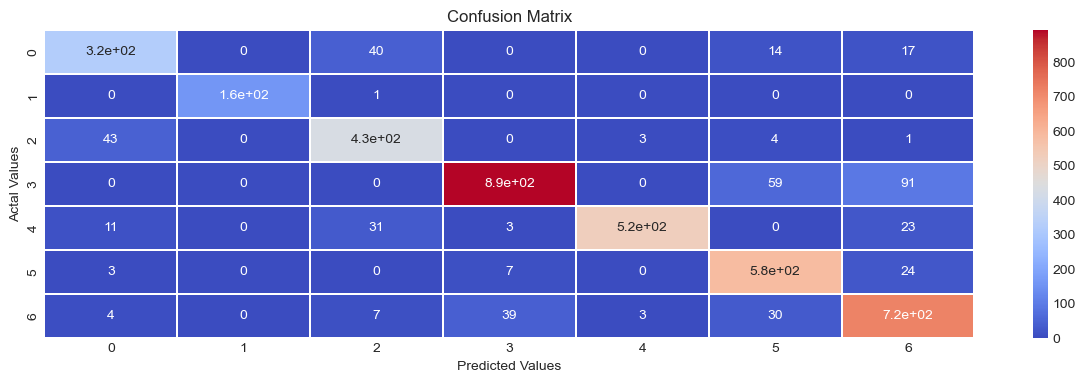

In [50]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(confusion_matrix,
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
#Plotting the confusion matrix
plt.figure(figsize=(15,4))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [51]:
print('BEST ROC AUC SCORE :',grid_search.best_score_)
print('Best hyperparameters :', grid_search.best_estimator_)

BEST ROC AUC SCORE : 0.9862795455787475
Best hyperparameters : DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=80)


In [52]:
# Checking Accuracy
print('Training Accuracy Score : {}'.format(accuracy_score(y_train, y_train_pred)))
print('Testing Accuracy Score : {}'.format(accuracy_score(y_test, y_test_pred)))

Training Accuracy Score : 0.873517371680487
Testing Accuracy Score : 0.8878550440744368


##### Here we can see that the accuracy of training and test, data and there is not much variation in the accuracy. From this we can confirm that this is a generalized model

In [53]:
# In this section we use a LabelBinarizer to binarize the target by one-hot-encoding in a OvR fashion. 
# This means that the target of shape (n_samples,) is mapped to a target of shape (n_samples, n_classes).

from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(y_train)
y_onehot_test = label_binarizer.transform(y_test)
y_onehot_test.shape  # (n_samples, n_classes)

(4084, 7)

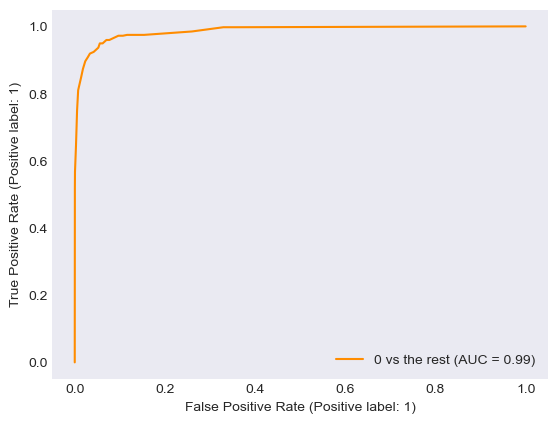

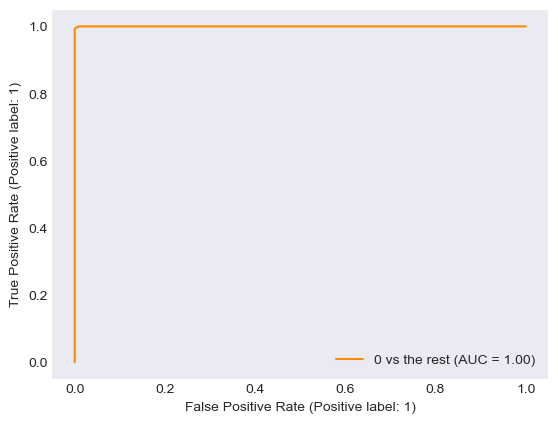

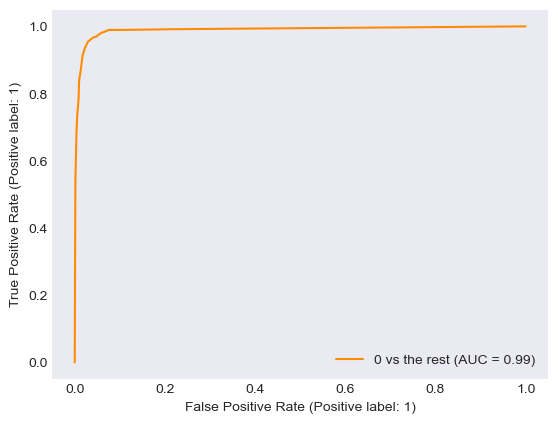

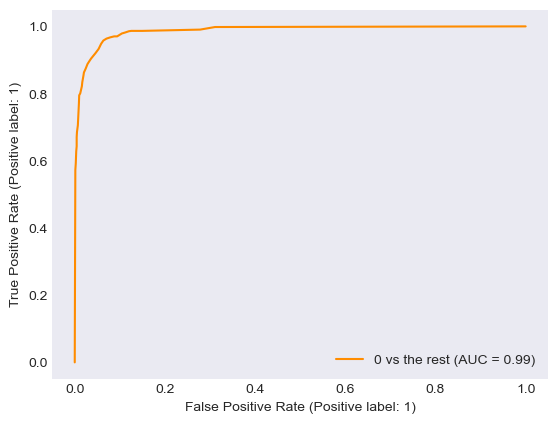

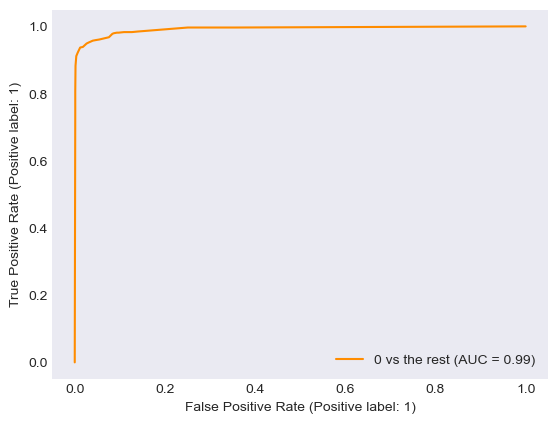

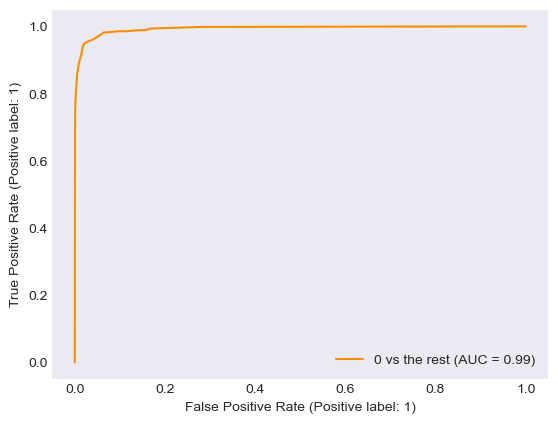

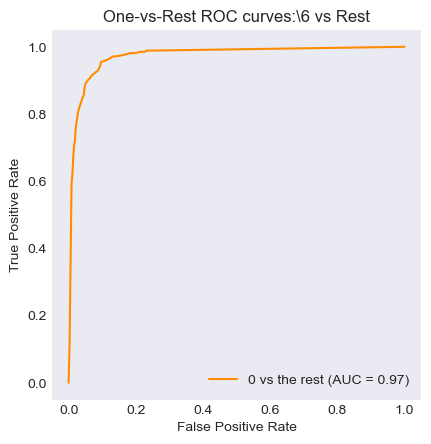

In [54]:
# plotting Roc-Auc Curve
from sklearn.metrics import RocCurveDisplay
y_score = dt_imb_model.fit(x_train, y_train).predict_proba(x_test)


for id_ in range(0,7):
    i = 0
    class_of_interest = i
    class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
    RocCurveDisplay.from_predictions(
        y_onehot_test[:, id_],
        y_score[:, id_],
        name=f"{class_of_interest} vs the rest",
        color="darkorange")
    i += 1

plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("One-vs-Rest ROC curves:\{} vs Rest".format(id_))
plt.legend()
plt.show()

[Text(0.4855072463768116, 0.9545454545454546, 'X[0] <= 0.898\ngini = 0.827\nsamples = 9527\nvalue = [927, 361, 1151, 2503, 1340, 1408, 1837]'),
 Text(0.14356884057971014, 0.8636363636363636, 'X[2] <= 1.319\ngini = 0.545\nsamples = 4105\nvalue = [4, 0, 0, 2413, 9, 1303, 376]'),
 Text(0.028985507246376812, 0.7727272727272727, 'X[1] <= 0.541\ngini = 0.118\nsamples = 1247\nvalue = [3, 0, 0, 69, 0, 1169, 6]'),
 Text(0.014492753623188406, 0.6818181818181818, 'gini = 0.132\nsamples = 57\nvalue = [0, 0, 0, 53, 0, 3, 1]'),
 Text(0.043478260869565216, 0.6818181818181818, 'X[7] <= -0.003\ngini = 0.04\nsamples = 1190\nvalue = [3, 0, 0, 16, 0, 1166, 5]'),
 Text(0.028985507246376812, 0.5909090909090909, 'gini = 0.361\nsamples = 59\nvalue = [0, 0, 0, 10, 0, 46, 3]'),
 Text(0.057971014492753624, 0.5909090909090909, 'X[2] <= 1.3\ngini = 0.019\nsamples = 1131\nvalue = [3, 0, 0, 6, 0, 1120, 2]'),
 Text(0.043478260869565216, 0.5, 'X[5] <= 0.914\ngini = 0.009\nsamples = 1061\nvalue = [3, 0, 0, 1, 0, 1056, 

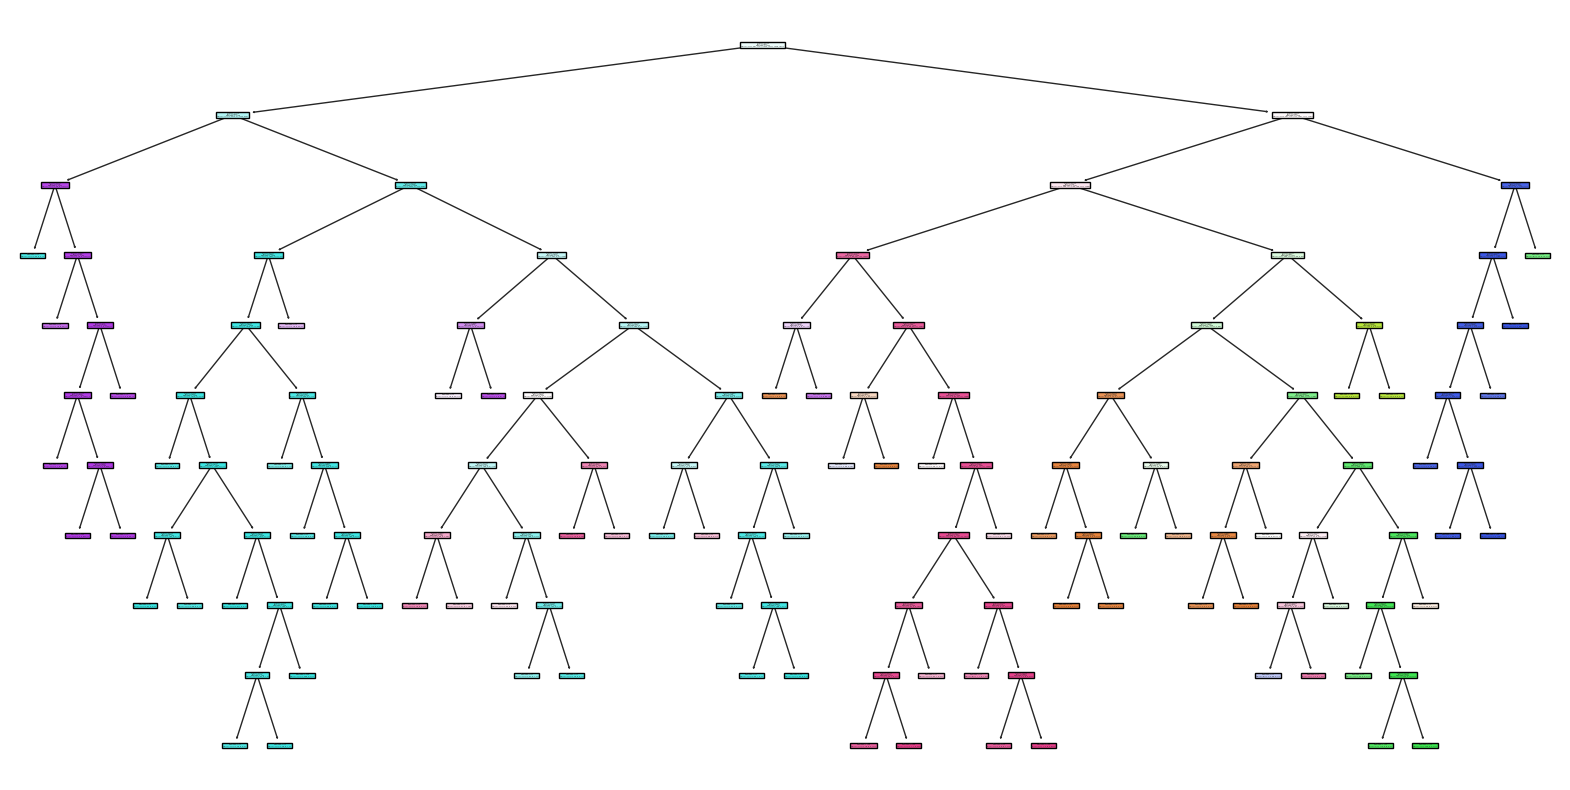

In [55]:
# Plotting Decision Tree
plt.figure(figsize=(20,10))
tree.plot_tree(dt_imb_model, filled=True, )

##### RandomForest

* The random forest algorithm is an extension of the bagging method as it utilizes both bagging and feature randomness to create an uncorrelated forest of decision trees. Feature randomness, also known as feature bagging or “the random subspace method”(link resides outside ibm.com) (PDF, 121 KB), generates a random subset of features, which ensures low correlation among decision trees. This is a key difference between decision trees and random forests. While decision trees consider all the possible feature splits, random forests only select a subset of those features.

In [56]:
# Hyperparameter for RandomForest
# Creating the parameter grid 
param_grid = {'bootstrap': [True, False],
                'max_depth': range(5, 15, 5,),
                'max_features': ['auto', 'sqrt'],
                'min_samples_leaf': range(50, 150, 50),
                'min_samples_split': range(50, 150, 50),
                'n_estimators': range(500, 2000, 400) 
 }


# Instantiate the grid search model
RF_tree = RandomForestClassifier()
import sklearn
multi_roc = sklearn.metrics.make_scorer(roc_auc_score, average='weighted', multi_class='ovr', needs_proba=True)
grid_search = GridSearchCV(estimator = RF_tree, 
                           param_grid = param_grid, 
                           scoring= multi_roc,
                           cv = 10, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 128 candidates, totalling 1280 fits


/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:427: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter 

GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': range(5, 15, 5),
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50),
                         'n_estimators': range(500, 2000, 400)},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=weighted, multi_class=ovr),
             verbose=1)

In [57]:
# cv results
cv_results_rf = pd.DataFrame(grid_search.cv_results_)
cv_results_rf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,5.565018,0.213439,0.144159,0.006971,True,5,auto,50,50,500,...,0.988518,0.985147,0.989206,0.987349,0.990568,0.985265,0.986046,0.988075,0.001991,74
1,11.750453,0.965147,0.313406,0.050166,True,5,auto,50,50,900,...,0.988396,0.985567,0.989144,0.986854,0.990627,0.985424,0.986073,0.988053,0.001928,79
2,16.409914,1.495583,0.364052,0.027871,True,5,auto,50,50,1300,...,0.988436,0.985689,0.989264,0.987189,0.990821,0.985207,0.986216,0.988128,0.001951,66
3,19.525114,0.071449,0.451347,0.020743,True,5,auto,50,50,1700,...,0.988355,0.985675,0.989366,0.987031,0.990533,0.985312,0.986004,0.988078,0.001943,73
4,5.868086,0.108453,0.150253,0.017808,True,5,auto,50,100,500,...,0.988455,0.985655,0.989314,0.987128,0.990421,0.985253,0.986004,0.988020,0.001868,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,33.891965,0.089341,0.469016,0.010944,False,10,sqrt,100,50,1700,...,0.990740,0.988427,0.991220,0.989334,0.992643,0.988498,0.989330,0.990513,0.001507,44
124,9.935693,0.074815,0.146550,0.007007,False,10,sqrt,100,100,500,...,0.990688,0.988361,0.991277,0.989273,0.992686,0.988368,0.989236,0.990476,0.001549,47
125,17.850572,0.074191,0.249819,0.003875,False,10,sqrt,100,100,900,...,0.990722,0.988401,0.991295,0.989320,0.992642,0.988360,0.989329,0.990515,0.001558,43
126,25.757898,0.091668,0.368337,0.015599,False,10,sqrt,100,100,1300,...,0.990685,0.988515,0.991183,0.989295,0.992609,0.988458,0.989413,0.990545,0.001518,36


In [58]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 50,
 'min_samples_split': 100,
 'n_estimators': 900}

In [59]:
# Modeling on train data with optimal hyperparameters
rf_imb_model = RandomForestClassifier(bootstrap=False, 
                                  random_state = 100,
                                  max_features = 'auto',
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100,
                                  n_estimators=500)

rf_imb_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                       min_samples_leaf=50, min_samples_split=100,
                       n_estimators=500, random_state=100)

In [60]:
# Predicting on train data
y_train_pred = rf_imb_model.predict(x_train)

In [61]:
# Modeling on train data with optimal hyperparameters
rf_imb_model = RandomForestClassifier(bootstrap=False, 
                                  random_state = 100,
                                  max_features = 'auto',
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=100,
                                  n_estimators=500)

rf_imb_model.fit(x_test, y_test)

RandomForestClassifier(bootstrap=False, max_depth=10, max_features='auto',
                       min_samples_leaf=50, min_samples_split=100,
                       n_estimators=500, random_state=100)

In [62]:
# Predicting on test data
y_test_pred = rf_imb_model.predict(x_test)

##### Evaluation of RandomForest

In [63]:
# Classification report of RandomForest
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

     class 0       0.96      0.91      0.93       927
     class 1       1.00      0.99      0.99       361
     class 2       0.93      0.96      0.94      1151
     class 3       0.92      0.94      0.93      2503
     class 4       0.96      0.94      0.95      1340
     class 5       0.96      0.94      0.95      1408
     class 6       0.86      0.88      0.87      1837

    accuracy                           0.93      9527
   macro avg       0.94      0.94      0.94      9527
weighted avg       0.93      0.93      0.93      9527



In [64]:
# Confusion matrix of each label
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix

array([[358,   0,  21,   0,   4,   4,   8],
       [  0, 160,   0,   0,   1,   0,   0],
       [ 19,   0, 439,   0,  14,   1,   6],
       [  1,   0,   0, 951,   1,  22,  68],
       [  1,   0,   7,   3, 559,   0,  18],
       [  1,   0,   0,  18,   0, 581,  19],
       [  1,   0,   4,  81,   7,   3, 703]])

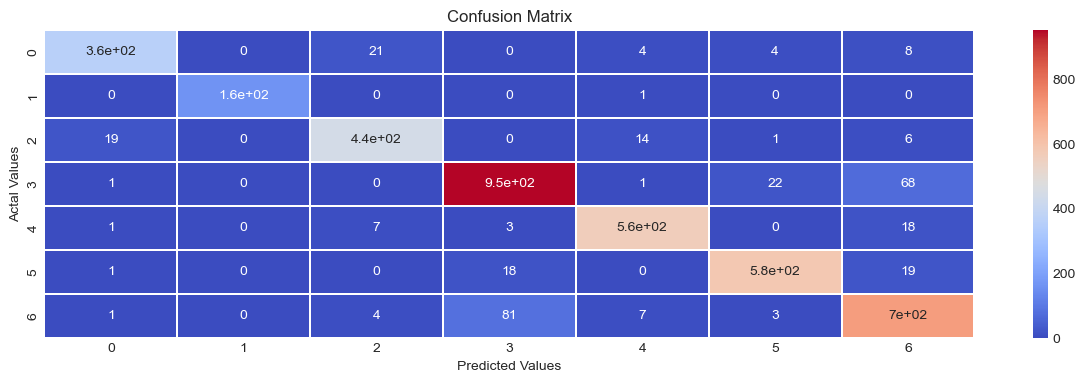

In [65]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(confusion_matrix,
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
#Plotting the confusion matrix
plt.figure(figsize=(15,4))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [66]:
print('BEST ROC AUC SCORE :',grid_search.best_score_)
print('Best hyperparameters :', grid_search.best_estimator_)
# Checking Accuracy
print('Training Accuracy Score : {}'.format(accuracy_score(y_train, y_train_pred)))
print('Testing Accuracy Score : {}'.format(accuracy_score(y_test, y_test_pred)))

BEST ROC AUC SCORE : 0.9921056026944871
Best hyperparameters : RandomForestClassifier(bootstrap=False, max_depth=10, min_samples_leaf=50,
                       min_samples_split=100, n_estimators=900)
Training Accuracy Score : 0.9282040516426997
Testing Accuracy Score : 0.9184622918707149


* This is a generalized model too

##### XGBoost
* XGBoost is a popular and efficient open-source implementation of the gradient boosted trees algorithm. Gradient boosting is a supervised learning algorithm, which attempts to accurately predict a target variable by combining the estimates of a set of simpler, weaker models. When using gradient boosting for regression, the weak learners are regression trees, and each regression tree maps an input data point to one of its leafs that contains a continuous score. XGBoost minimizes a regularized (L1 and L2) objective function that combines a convex loss function (based on the difference between the predicted and target outputs) and a penalty term for model complexity (in other words, the regression tree functions). The training proceeds iteratively, adding new trees that predict the residuals or errors of prior trees that are then combined with previous trees to make the final prediction. It's called gradient boosting because it uses a gradient descent algorithm to minimize the loss when adding new models.

In [67]:
# Hyperparameter for XGBoost
# Creating the parameter grid 

param_grid = {
                'colsample_bytree' : [i/10.0 for i in range(6,8)],
                'max_depth': [3,4,5],
                'min_child_weight' : [4, 5, 6],
                'gamma' : [i/10.0 for i in range(0,3)],
                'learning_rate' : [0.001, 0.01, 0.1],
                'n_estimators': [500, 800] 
 }


# Instantiate the grid search model
xg_b = xgb.XGBClassifier(silent=1)
import sklearn
multi_roc = sklearn.metrics.make_scorer(roc_auc_score, average='weighted', multi_class='ovr', needs_proba=True)
grid_search = GridSearchCV(estimator = xg_b, 
                           param_grid = param_grid, 
                           scoring= multi_roc,
                           cv = 10, 
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 324 candidates, totalling 3240 fits


/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:13:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:14:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:14:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:14:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:14:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:15:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:15:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:15:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:15:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:16:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:16:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:16:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:17:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:17:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:18:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:18:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:18:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:20:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:20:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:20:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:20:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:21:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:21:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:21:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:22:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:22:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:22:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:22:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:23:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:23:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:23:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:23:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:24:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:24:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:24:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:24:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:25:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:26:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:26:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:26:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:26:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:27:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:27:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:27:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:27:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:28:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:28:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:28:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:28:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:29:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:29:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:29:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:30:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:30:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:31:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:31:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:31:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:32:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:32:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:32:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:33:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:33:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:33:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:34:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:34:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:34:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:34:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:35:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:35:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:35:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:36:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:37:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:37:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:46] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:38:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:39:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:39:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:40:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:40:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:40:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:40:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:40:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:41:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:42:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:42:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:42:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:44:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:44:05] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:44:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:45:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:46:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:46:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:46:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:46:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:47:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:47:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:47:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:47:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:48:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:48:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:48:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:49:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:49:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:49:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:50:48] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:51:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:01] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:53:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:54:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:55:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:55:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:55:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:55:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:56:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:56:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:56:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:57:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:57:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:58:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:59:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:59:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [04:59:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:00:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:00:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:00:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:01:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:00] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:02:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:03:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:03:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:03:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:03:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:04:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:04:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:04:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:04:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:05:19] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:05:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:06:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:06:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:06:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:06:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:04] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:58] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:07:59] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:08:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:08:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:08:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:09:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:09:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:10:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:10:02] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:11:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:11:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:11:14] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:12:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:12:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:13:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:13:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:13:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:13:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:14:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:14:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:15:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:16:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:16:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:16:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:16:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:12] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:17:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:18:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:18:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:18:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:18:35] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:10] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:11] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:51] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:19:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:20:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:20:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:20:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:20:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:21:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:21:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:21:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:21:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:22:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:22:09] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:22:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:22:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:23:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:23:13] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:23:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:24:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:24:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:24:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:24:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:25:39] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:25:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:25:41] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:25:45] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:26:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:26:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:26:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:26:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:27:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:27:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:27:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:27:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:28:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:28:17] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:28:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:28:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:29:20] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:29:21] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:29:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:30:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:30:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:30:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:30:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:06] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:07] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:31:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:18] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:22] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:53] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:32:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:33:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9/site-packages/xgboost/core.py:160: UserWarning: [05:33:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/rahul/opt/anaconda3/lib/python3.9

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None...
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.6, 0.7],
                         'gamma': [0.0, 0.1, 0.2],
                         'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 4, 5], 'min_child_weight': [4, 5, 6],
                         'n_estimators': [500, 800]},
             scoring=make_scorer(roc_auc_score, needs_proba=True, average=weighted, multi_class=ovr),
             verbose=1)

In [68]:
# cv results
cv_results_xgb = pd.DataFrame(grid_search.cv_results_)
cv_results_xgb

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_min_child_weight,param_n_estimators,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,3.712027,0.220569,0.056331,0.003851,0.6,0.0,0.001,3,4,500,...,0.988540,0.985805,0.990176,0.987018,0.991759,0.988162,0.987434,0.989013,0.001943,311
1,6.410679,0.070374,0.091963,0.006009,0.6,0.0,0.001,3,4,800,...,0.989214,0.986483,0.990578,0.987557,0.992085,0.988495,0.988233,0.989519,0.001818,295
2,3.961838,0.024074,0.061208,0.002312,0.6,0.0,0.001,3,5,500,...,0.988534,0.985838,0.990174,0.986995,0.991754,0.988223,0.987433,0.989013,0.001934,310
3,6.299919,0.069100,0.090346,0.001480,0.6,0.0,0.001,3,5,800,...,0.989201,0.986501,0.990577,0.987557,0.992090,0.988571,0.988229,0.989525,0.001811,293
4,3.917283,0.034208,0.058913,0.002399,0.6,0.0,0.001,3,6,500,...,0.988531,0.985839,0.990182,0.986999,0.991745,0.988232,0.987434,0.989019,0.001935,308
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,4.829061,0.044307,0.043719,0.002418,0.7,0.2,0.1,5,4,800,...,0.993440,0.992602,0.995029,0.993600,0.995077,0.992597,0.993623,0.993830,0.000970,59
320,3.342922,0.021607,0.041621,0.001779,0.7,0.2,0.1,5,5,500,...,0.993767,0.992693,0.994920,0.993532,0.995234,0.992703,0.993684,0.993920,0.000918,32
321,4.767705,0.062277,0.043074,0.001189,0.7,0.2,0.1,5,5,800,...,0.993767,0.992693,0.994920,0.993532,0.995234,0.992703,0.993684,0.993920,0.000918,32
322,3.305757,0.029217,0.041135,0.001486,0.7,0.2,0.1,5,6,500,...,0.993497,0.992616,0.994859,0.993647,0.995075,0.992889,0.993807,0.993888,0.000873,41


In [69]:
grid_search.best_params_

{'colsample_bytree': 0.7,
 'gamma': 0.0,
 'learning_rate': 0.01,
 'max_depth': 5,
 'min_child_weight': 5,
 'n_estimators': 800}

In [70]:
# Modeling on train data with optimal hyperparameters
xgb_imb_model = xgb.XGBClassifier(colsample_bytree=0.7,
                                 gamma = 0.1,
                                 learning_rate = 0.01,
                                 max_depth = 5,
                                 min_child_weight = 6,
                                 n_estimators = 800)

xgb_imb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [71]:
y_train_pred = xgb_imb_model.predict(x_train)

In [72]:
# Modeling on train data with optimal hyperparameters
xgb_imb_model = xgb.XGBClassifier(colsample_bytree=0.7,
                                 gamma = 0.1,
                                 learning_rate = 0.01,
                                 max_depth = 5,
                                 min_child_weight = 6,
                                 n_estimators = 800)

xgb_imb_model.fit(x_test, y_test)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=6, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [73]:
y_test_pred = xgb_imb_model.predict(x_test)

##### Evaluation of XGBoost

In [74]:
# Classification report of RandomForest
display_scores(y_train, y_train_pred)

Classification Report: 
               precision    recall  f1-score   support

     class 0       0.99      0.96      0.98       927
     class 1       1.00      1.00      1.00       361
     class 2       0.98      0.98      0.98      1151
     class 3       0.93      0.95      0.94      2503
     class 4       0.98      0.97      0.97      1340
     class 5       0.97      0.97      0.97      1408
     class 6       0.91      0.90      0.91      1837

    accuracy                           0.95      9527
   macro avg       0.96      0.96      0.96      9527
weighted avg       0.95      0.95      0.95      9527



In [75]:
# Confusion matrix of each label
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, y_test_pred)
confusion_matrix

array([[ 384,    0,    9,    0,    0,    1,    1],
       [   0,  161,    0,    0,    0,    0,    0],
       [   6,    0,  464,    0,    6,    2,    1],
       [   0,    0,    0, 1005,    0,    6,   32],
       [   1,    0,    2,    1,  578,    0,    6],
       [   1,    0,    0,    4,    0,  605,    9],
       [   0,    0,    0,   40,    2,    1,  756]])

In [81]:
cm = sklearn.metrics.multilabel_confusion_matrix(y_test, y_test_pred)
cm

array([[[3681,    8],
        [  11,  384]],

       [[3923,    0],
        [   0,  161]],

       [[3594,   11],
        [  15,  464]],

       [[2996,   45],
        [  38, 1005]],

       [[3488,    8],
        [  10,  578]],

       [[3455,   10],
        [  14,  605]],

       [[3236,   49],
        [  43,  756]]])

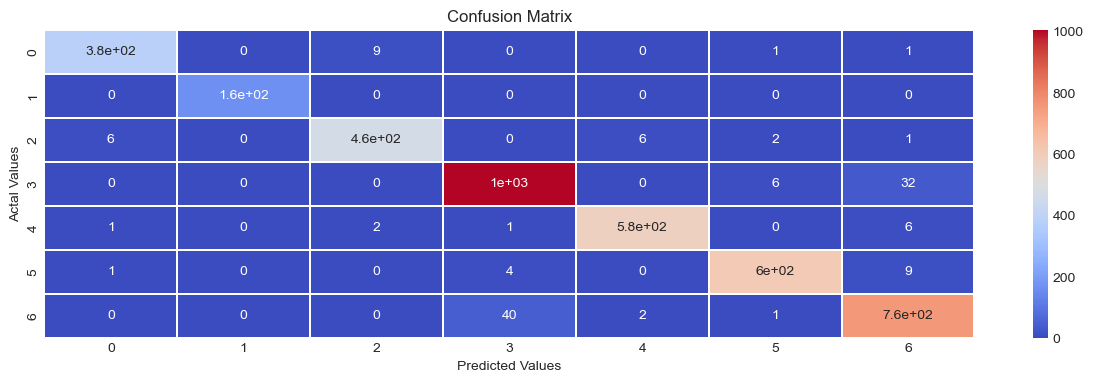

In [76]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(confusion_matrix,
                     index = [0,1,2,3,4,5,6], 
                     columns = [0,1,2,3,4,5,6])
#Plotting the confusion matrix
plt.figure(figsize=(15,4))
sns.heatmap(cm_df, annot=True, cmap='coolwarm', linewidths=0.1)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [77]:
print('BEST ROC AUC SCORE :',grid_search.best_score_)
print('Best hyperparameters :', grid_search.best_estimator_)
# Checking Accuracy
print('Training Accuracy Score : {}'.format(accuracy_score(y_train, y_train_pred)))
print('Testing Accuracy Score : {}'.format(accuracy_score(y_test, y_test_pred)))

BEST ROC AUC SCORE : 0.9940642162808132
Best hyperparameters : XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=800, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)
Training Accuracy Score : 0.9530807179594836
Testing Accuracy Score : 0.9679236043095005


### Voting Classifiers

In [78]:
from sklearn.ensemble import VotingClassifier
scores = []
model_names = []
voting_clf = VotingClassifier(estimators=[('dt', dt_imb_model), ('rf', rf_imb_model), ('xgb', xgb_imb_model)])
for clf in (dt_imb_model, rf_imb_model, xgb_imb_model):
    clf.fit(x_test, y_test)
    y_pred = clf.predict(x_test)
    result = (clf.__class__.__name__, accuracy_score(y_test, y_pred))
    scores.append(result[1])
    model_names.append(result[0])

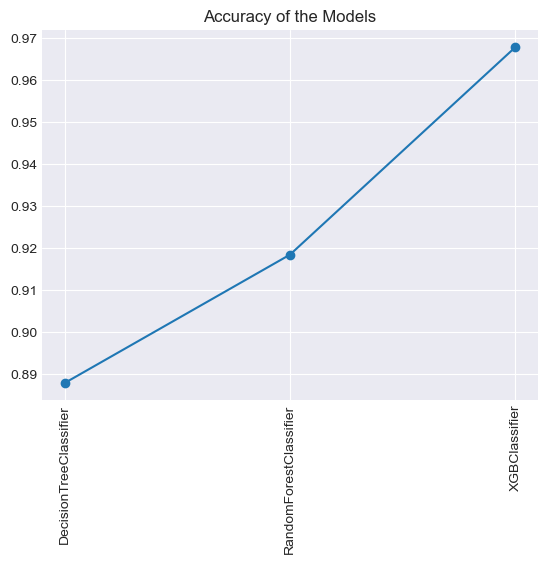

In [79]:
# Visualizing the accuracy for each model
plt.plot(range(len(model_names)),scores, '-o')

plt.xticks(range(0,3,1),labels = model_names, rotation = 90)
plt.grid(visible=True)
plt.title('Accuracy of the Models')

plt.show()

##### Here we can observe that XGBosst has the highest accuracy later Random Forest and then DecisionTree. XGBoost also classified observations more accurate than other models we can confirm it by checking the confusion matrix and the precision, recall and F1 scores are above 0.9 for all the classes in contrast to RF AND DT . DecisionTree, RandomForest and XGBoost have an accuracy of  0.88, 0.91, 0.96 